---

### Imports section

In [1]:
# Let's import useful packages for this notebook

import pandas as pd
import wikipedia as wp
from geopy.geocoders import Nominatim
import time

# Import packages to make api calls
import requests
import json


# Packages for data viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Define a style  
mpl.style.use('seaborn-whitegrid')

In [2]:
# Create an instance of Nominatim
geolocator = Nominatim(user_agent="my_app")

---

### Functions section

In [157]:
# Function to check the difference of two (2) pandas series
def is_diff(serie_1, serie_2):
    d1 = set(serie_1.unique().tolist())
    d2 = set(serie_2.unique().tolist())
    if not (d1.difference(d2)):
        print('Absolutely no difference')
    else:
        print(d1.difference(d2))

---

In [111]:
# Import and display some datasets
df_1 = pd.read_csv(r'../output/ht_airports.csv')
df_2 = pd.read_csv(r'../output/ht_dep_sup.csv')
df_3 = pd.read_csv(r'../output/ht_pop_by_dep.csv')
display(df_1.head())
display(df_2.head())
display(df_3.head())

,name,municipality,type,latitude_deg,longitude_deg,iso_country,iso_region,score
0,Toussaint Louverture International Airport,Port-au-Prince,medium_airport,18.580000,-72.292503,HT,HT-OU,975
1,Cap Haitien International Airport,Cap Haitien,medium_airport,19.733000,-72.194702,HT,HT-ND,800
2,Jacmel Airport,Jacmel,medium_airport,18.241100,-72.518501,HT,HT-SE,250
3,Port-de-Paix Airport,Port-de-Paix,medium_airport,19.933599,-72.848602,HT,HT-NO,450
4,Les Cayes Airport,Les Cayes,medium_airport,18.271099,-73.788300,HT,HT-SD,250


,Département,Chef-Lieu ou Capitale,Superficie (km²)
0,Artibonite,Les Gonaïves,4984
1,Centre,Hinche,3675
2,Grande'Anse,Jérémie,1871
3,Nippes,Miragoâne,1268
4,Nord,Cap-Haïtien,2106


,adm0code,adm0_en,adm1_en,adm1_fr,IHSI_UNFPA_2019
0,HT,Haiti,West,Ouest,5010205
1,HT,Haiti,South-East,Sud-Est,893900
2,HT,Haiti,North,Nord,1159761
3,HT,Haiti,North-East,Nord-Est,444463
4,HT,Haiti,Artibonite,Artibonite,2047152


### Displaying, renaming and merging datasets

In [112]:
df_2.columns

Index(['Département', 'Chef-Lieu ou Capitale', 'Superficie (km²)'], dtype='object')

In [113]:
df_3.columns

Index(['adm0code', 'adm0_en', 'adm1_en', 'adm1_fr', 'IHSI_UNFPA_2019'], dtype='object')

In [114]:
df_3.rename(columns={'adm1_fr':'Département'}, inplace = True)
df_3.head()

,adm0code,adm0_en,adm1_en,Département,IHSI_UNFPA_2019
0,HT,Haiti,West,Ouest,5010205
1,HT,Haiti,South-East,Sud-Est,893900
2,HT,Haiti,North,Nord,1159761
3,HT,Haiti,North-East,Nord-Est,444463
4,HT,Haiti,Artibonite,Artibonite,2047152


In [115]:
df_ht = df_2.merge(df_3[['Département','adm0code','IHSI_UNFPA_2019']], on='Département', how='right')
df_ht.rename(columns={'IHSI_UNFPA_2019':'Population'}, inplace = True)
df_ht.head()

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population
0,Artibonite,Les Gonaïves,4984,HT,2047152
1,Centre,Hinche,3675,HT,845594
2,Grande'Anse,Jérémie,1871,HT,481065
3,Nippes,Miragoâne,1268,HT,351593
4,Nord,Cap-Haïtien,2106,HT,1159761


In [116]:
df_ht.dtypes

Département              object
Chef-Lieu ou Capitale    object
Superficie (km²)          int64
adm0code                 object
Population                int64
dtype: object

### Computing a new column for density by Department

In [117]:
df_ht['Density/km²'] = (df_ht.Population / df_ht['Superficie (km²)']).apply(lambda x: round(x) + 1 )
df_ht.head()

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²
0,Artibonite,Les Gonaïves,4984,HT,2047152,412
1,Centre,Hinche,3675,HT,845594,231
2,Grande'Anse,Jérémie,1871,HT,481065,258
3,Nippes,Miragoâne,1268,HT,351593,278
4,Nord,Cap-Haïtien,2106,HT,1159761,552


In [118]:
df_ht.dtypes

Département              object
Chef-Lieu ou Capitale    object
Superficie (km²)          int64
adm0code                 object
Population                int64
Density/km²               int64
dtype: object

In [119]:
# Using the instance of Geopy to retrieve geographical coordinates for each Department
start = time.time()

df_ht['address'] = df_ht['Chef-Lieu ou Capitale'] +', '+ df_ht['adm0code']
df_ht['lat'] = df_ht['address'].apply(lambda x: geolocator.geocode(x).latitude )
df_ht['lon'] = df_ht['address'].apply(lambda x: geolocator.geocode(x).longitude )
df_ht['address'] = df_ht['address'].apply(lambda x: geolocator.geocode(x).address )

end = time.time()
print(f'This cell took exactly {end-start} secondes to execute')

display(df_ht.head())

This cell took exactly 19.913043975830078 secondes to execute


,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807


In [11]:
df_ht_healthsites = pd.read_csv(r'../input/haiti-healthsites.csv')
df_ht_healthsites.head()

,Adm1code,adm1_fr,adm1_ht,adm2code,adm2_en,adm2_fr,adm3code,adm3_en,adm3_fr,Institution name,Catégorie,Institution_Type,Institution_Code,LatDD,LongDD
0,NaN,#adm1+name+fr,#adm1+tname+ht,#adm2+code,#adm2+name+en,#adm2+name+fr,#adm3+code,#adm3+name+en,#adm3+name+fr,#loc+name,#loc+id,#loc+type,#loc+code,#lat,#long
1,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Centre de Santé Snelak,Dispensaire,Privé à but lucratif,111607,"18,525922","-72,335068"
2,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Centre de psychiatrie Mars & Kline,HCR,Public,111616,"18,525922","-72,335068"
3,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Hôpital St. François de Salle,CSL,Privé à but lucratif,111618,"18,537777","-72,344001"
4,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,CSL SODEC,CAL,Privé à but lucratif,111619,"18,525922","-72,335068"


In [12]:
df_ht_healthsites.drop(0, axis=0, inplace=True)
df_ht_healthsites.reset_index(drop=True, inplace = True)
df_ht_healthsites.head()

,Adm1code,adm1_fr,adm1_ht,adm2code,adm2_en,adm2_fr,adm3code,adm3_en,adm3_fr,Institution name,Catégorie,Institution_Type,Institution_Code,LatDD,LongDD
0,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Centre de Santé Snelak,Dispensaire,Privé à but lucratif,111607,"18,525922","-72,335068"
1,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Centre de psychiatrie Mars & Kline,HCR,Public,111616,"18,525922","-72,335068"
2,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,Hôpital St. François de Salle,CSL,Privé à but lucratif,111618,"18,537777","-72,344001"
3,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,CSL SODEC,CAL,Privé à but lucratif,111619,"18,525922","-72,335068"
4,HT01,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,HT0111-01,1re Section Turgeau,1re Section Turgeau,PROFAMIL 2,CSL,Privé à but non lucratif,111620,"18,525922","-72,335068"


In [23]:
df_ht_healthsites['Catégorie'].unique()

array(['Dispensaire', 'HCR', 'CSL', 'CAL', 'Hôpital', 'HU', 'HD',
       'Hôpital spécial.', 'Point Fixe', nan], dtype=object)

In [22]:
df_ht_healthsites_count = df_ht_healthsites.groupby('adm1_fr').count().reset_index()[['adm1_fr','Institution name']]
df_ht_healthsites_count

,adm1_fr,Institution name
0,Artibonite,436
1,Centre,100
2,Grande'Anse,0
3,Nippes,0
4,Nord,68
5,Nord-Est,0
6,Nord-Ouest,0
7,Ouest,126
8,Sud,0
9,Sud-Est,0


data_ht.keys()

data_ht['elements'][103]

geolocator = Nominatim(user_agent="api1")
location = geolocator.reverse(str(data_ht['elements'][103]['lat']) + ", " + str(data_ht['elements'][103]['lon']))
print(location.address)

location.raw

In [83]:
amenity_list = ['hospital', 'clinic', 'doctors', 'pharmacy']
country_ht, type_ht, lat_ht, lon_ht, categ_ht, name_ht = [], [], [], [], [], []

for amen in amenity_list[:2]:    
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f'[out:json][timeout:25];area["ISO3166-1"="HT"][admin_level=2];(node["amenity"={amen}](area);way["amenity"={amen}](area);rel["amenity"={amen}](area););out center;'
    
    response_ht = requests.get(overpass_url, 
                            params={'data': overpass_query},timeout=10)
    data_ht = response_ht.json()
    
    print('------------------------------------'+amen)
    
    for element in data_ht['elements']:
        country_ht.append('HT')
        type_ht.append(element['type'])
        lat_ht.append(element['lat'])
        lon_ht.append(element['lon'])
        categ_ht.append(element['tags']['amenity'])
        if 'name' in element['tags'].keys():
            name_ht.append(element['tags']['name'])
            print(element['tags']['name'])
        else:
            name_ht.append('unknown name')
            print('Unknown')
    time.sleep(2)

------------------------------------hospital
HOPITAL LA PROVIDENCE
Le Sourire
Dispensaire "N.D. des Malades"
French Hospital
Help Hospital
Croix-Rouge
Orthopedic clinic
Universal Medical Centre
Hôpital de l'Ofatma (Cité Militaire)
Clinique de la Sante
Citymed Petion-Ville
Maternité de Christ Roi
Centre Materno-Chirurgical
Clinic de Reference
Complexe Materno-Medico
Sante Pep La
PIGNON HOSPITAL LA JEUNE
Rehabilitation de l'Hopital
Hospital Grande Rivière du Nord
Hôpital Raboteau
Hôpital-Maternité Sapiens
MSF Orthopedic Hospital Carrefour
St. Vincent
Hospital Raboteau
Hospital Eglise Wesleyan Fauché
Hospital La Saline (Pediatrie Sociale)
Hôpital Saint Ésprit
Hospital Bonneau St. Joseph
Hospital Bonne Fin
Hospital Bethel Fonds-des-Nègres / Armée du Salut
Centre de Santé la Visitation Petite Rivière de Nippes
Hospital La Sainte Famille
Hopital Maternite Mathieu
College Excelsior
Hospital De La Communauté
Centre Médico-Social Populorum Progressio
Hospital Bon Berger
Centre De Psychiatrie Et

Clinique Médicale St Pierre
Croix Rouge Haitienne
Croix Rouge Haitienne
Centre Medical Grann Guitonn
Clinique Exuline Laguèrre
Mission Matana
Dispensaire communautaire de Jeanton ATSBA
Unknown
Sanatorium des Cayes
George's Clinic
Dispensaire Men Ansanm
Unknown
Dispensaire Saint Joseph Pemerle
Centre de Santé Madame Bernard
Saint Antoine
Dispensaire
Unknown
Unknown
Clinque Dentaire
Dispensaire du Docteur Durand
Dispensaire de Bertan
Dispensaire Comunautaire de Gervet
Unknown
Unknown
Unknown
Lambert Santé
Hopital de la Nativite
Dispensair Bas Lavoute
Dispansè komotè de ravin dè Roch
Unknown
Hopital Autrichien Haitien
Hôpital Bernard Mevs
Medecin Sans Frontiere MSF
Dispensaire Notre Dame de la Présentation
Centre de Santé de Limonade
Centre de Santé de Quartier Morin
Unknown
Centre de Sante Communautaire
Dispenssaires Secours
Dispensaire Diference plus
Hopital de la convention de la baptiste d\'Haiti
Centre de Sante Merlin Medical Relief Lasling Health Care
Hospital de secours des Gonaive

In [84]:
for amen in amenity_list[2:]:    
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f'[out:json][timeout:25];area["ISO3166-1"="HT"][admin_level=2];(node["amenity"={amen}](area);way["amenity"={amen}](area);rel["amenity"={amen}](area););out center;'
    
    response_ht = requests.get(overpass_url, 
                            params={'data': overpass_query},timeout=10)
    data_ht = response_ht.json()
    
    print('------------------------------------'+amen)
    
    for element in data_ht['elements']:
        country_ht.append('HT')
        type_ht.append(element['type'])
        lat_ht.append(element['lat'])
        lon_ht.append(element['lon'])
        categ_ht.append(element['tags']['amenity'])
        if 'name' in element['tags'].keys():
            name_ht.append(element['tags']['name'])
            print(element['tags']['name'])
        else:
            name_ht.append('unknown name')
            print('Unknown')
    time.sleep(2)

------------------------------------doctors
Clinic
Clinic Roger Emmanuel
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
l'Arche des Enfants
mayte
Unknown
Clinique Saint Soleil
Centre de Santé Familiale
complexe medico-chirurgical,bon samaritain
clinique medical
Sant medical Santo 20
Obstetrique-Gynecologue
Clinique Medico Docteur Claupha
Centre Medical Joseph Edmond et Pharmacie
Clinipharma Ma sante
Clinique Beaulieu
Clinique medicale Chirurgicale et Steri Lab Laboratoire medical
Dental office Radiographie
MEDITEL SA
Unknown
Le Pivert
Merk Clinique
FEBS
Fondation Esther Bourcicault Stanislas
Constitution Mertenal
Constitution Mertenal
Unknown
International Medical Corps
Clinique Medicale de Saint-Marc
Ministere de la sante publique
CERBIO-LAB
Cadiolab Laboratoire Graphtech
Unknown
FEBS
Optimed Clinique
M et M
Clinique Revolution De Bois Bouton
Centre Me
Clinic City Med Cayes
Unknown
Dispanse Kominote Senate Polycap
Dispanse Bonami
Dispasè kominote Doktè Policap Souffri

In [85]:
df_health = pd.DataFrame({'Name':name_ht, 'Type':type_ht, 'Category':categ_ht, 'Country':country_ht, 'lat':lat_ht, 'lon':lon_ht})

In [86]:
df_health.head()

,Name,Type,Category,Country,lat,lon
0,HOPITAL LA PROVIDENCE,node,hospital,HT,19.450206,-72.685424
1,Le Sourire,node,hospital,HT,18.508700,-72.630274
2,"Dispensaire ""N.D. des Malades""",node,hospital,HT,18.191978,-73.744801
3,French Hospital,node,hospital,HT,18.540614,-72.316322
4,Help Hospital,node,hospital,HT,18.505910,-72.625009


In [87]:
df_health['geocode'] = df_health.lat.astype('str') + ' , ' + df_health.lon.astype('str')
df_health.head()

,Name,Type,Category,Country,lat,lon,geocode
0,HOPITAL LA PROVIDENCE,node,hospital,HT,19.450206,-72.685424,"19.450206 , -72.685424"
1,Le Sourire,node,hospital,HT,18.508700,-72.630274,"18.5087003 , -72.6302745"
2,"Dispensaire ""N.D. des Malades""",node,hospital,HT,18.191978,-73.744801,"18.1919778 , -73.7448006"
3,French Hospital,node,hospital,HT,18.540614,-72.316322,"18.5406142 , -72.3163221"
4,Help Hospital,node,hospital,HT,18.505910,-72.625009,"18.5059105 , -72.6250088"


In [88]:
a = time.time()

df_health['Département'] = df_health.geocode.apply(lambda x: geolocator.reverse(x).raw['address']['state'])
df_health.head()

b = time.time()

print(f'This code took exactly {b-a} secondes to exectute')

This code took exactly 1016.1661229133606 to exectute


In [90]:
# Backup this dataframe as it takes too long to get
df_health_copy = df_health.copy()

In [91]:
# Create a list of prefix to rename every single element in the 'Département' column
list__ = ["Département de l'", 'Département du ', 'Département des ', 'Département de la ']

for replacer in list__:
    df_health['Département'] = df_health['Département'].str.replace(replacer, '')
    
df_health.head()

,Name,Type,Category,Country,lat,lon,geocode,Département
0,HOPITAL LA PROVIDENCE,node,hospital,HT,19.450206,-72.685424,"19.450206 , -72.685424",Artibonite
1,Le Sourire,node,hospital,HT,18.508700,-72.630274,"18.5087003 , -72.6302745",Ouest
2,"Dispensaire ""N.D. des Malades""",node,hospital,HT,18.191978,-73.744801,"18.1919778 , -73.7448006",Sud
3,French Hospital,node,hospital,HT,18.540614,-72.316322,"18.5406142 , -72.3163221",Ouest
4,Help Hospital,node,hospital,HT,18.505910,-72.625009,"18.5059105 , -72.6250088",Ouest


In [92]:
# Display the unique elements of the 'Département' column
df_health['Département'].unique()

array(['Artibonite', 'Ouest', 'Sud', 'Nord-Est', 'Nord-Ouest', 'Nord',
       'Nippes', 'Sud-Est', 'Grande-Anse', 'Centre'], dtype=object)

In [169]:
# Replace value to reach our naming convention for departments
df_health['Département'] = df_health['Département'].replace('Grande-Anse',"Grande'Anse")

In [93]:
df_health.shape

(2002, 8)

In [172]:
df_health[df_health.Category == 'hospital'].groupby('Département').count()

,Name,Type,Category,Country,lat,lon,geocode
Département,,,,,,,
Artibonite,184,184,184,184,184,184,184
Centre,73,73,73,73,73,73,73
Grande'Anse,64,64,64,64,64,64,64
Nippes,38,38,38,38,38,38,38
Nord,107,107,107,107,107,107,107
Nord-Est,55,55,55,55,55,55,55
Nord-Ouest,89,89,89,89,89,89,89
Ouest,415,415,415,415,415,415,415
Sud,111,111,111,111,111,111,111


In [173]:
df_health[df_health.Category == 'doctors'].groupby('Département').count()

,Name,Type,Category,Country,lat,lon,geocode
Département,,,,,,,
Artibonite,17,17,17,17,17,17,17
Nord,7,7,7,7,7,7,7
Ouest,32,32,32,32,32,32,32
Sud,9,9,9,9,9,9,9
Sud-Est,1,1,1,1,1,1,1


In [174]:
df_health[df_health.Category == 'clinic'].groupby('Département').count()

,Name,Type,Category,Country,lat,lon,geocode
Département,,,,,,,
Artibonite,10,10,10,10,10,10,10
Grande'Anse,4,4,4,4,4,4,4
Nippes,1,1,1,1,1,1,1
Nord,30,30,30,30,30,30,30
Nord-Est,23,23,23,23,23,23,23
Nord-Ouest,2,2,2,2,2,2,2
Ouest,74,74,74,74,74,74,74
Sud,3,3,3,3,3,3,3
Sud-Est,1,1,1,1,1,1,1


In [175]:
df_health[df_health.Category == 'pharmacy'].groupby(['Département', 'Category']).count()

,,Name,Type,Country,lat,lon,geocode
Département,Category,,,,,,
Artibonite,pharmacy,81,81,81,81,81,81
Centre,pharmacy,21,21,21,21,21,21
Grande'Anse,pharmacy,7,7,7,7,7,7
Nord,pharmacy,45,45,45,45,45,45
Nord-Est,pharmacy,56,56,56,56,56,56
Nord-Ouest,pharmacy,5,5,5,5,5,5
Ouest,pharmacy,273,273,273,273,273,273
Sud,pharmacy,62,62,62,62,62,62
Sud-Est,pharmacy,24,24,24,24,24,24


In [176]:
# Exporting the dataframe to a csv dataset
df_health.to_csv(r'../output/cleaned/haiti-healthsites-by-department.csv', index = False)

In [165]:
# Create new dataframe to display number of health facilities by department and by category
distribution_by_dept = df_health.groupby(['Département', 'Category']).count().reset_index().rename(columns={'Name':'count'})[['Département','Category','count']]
display(distribution_by_dept.head())

# Displaying the dataframe of Haiti departments so we can figure out what to fix for a better merging
display(df_ht.head())

,Département,Category,count
0,Artibonite,clinic,10
1,Artibonite,doctors,17
2,Artibonite,hospital,184
3,Artibonite,pharmacy,81
4,Centre,hospital,73


,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807


In [166]:
# Check whether the 'Département' column of both of the dataframes are identicals
is_diff(distribution_by_dept['Département'], df_ht['Département'])

{'Grande-Anse'}


In [167]:
# Replace value to reach our naming convention for departments
distribution_by_dept['Département'] = distribution_by_dept['Département'].replace('Grande-Anse',"Grande'Anse")
distribution_by_dept['Département'].unique()

array(['Artibonite', 'Centre', "Grande'Anse", 'Nippes', 'Nord',
       'Nord-Est', 'Nord-Ouest', 'Ouest', 'Sud', 'Sud-Est'], dtype=object)

In [168]:
# Check whether the 'Département' column of both of the dataframes are identical
is_diff(distribution_by_dept['Département'], df_ht['Département'])

Absolutely no difference


In [142]:
distribution_by_dept.head()

,Département,Category,count
0,Artibonite,clinic,10
1,Artibonite,doctors,17
2,Artibonite,hospital,184
3,Artibonite,pharmacy,81
4,Centre,hospital,73


In [128]:
# Backup dataframe
df_ht_copy = df_ht.copy()

In [170]:
# Loop through departments to retrieve number of facilities by category

for dept in distribution_by_dept['Département'].unique().tolist():
    # List of category available by department
    categ = distribution_by_dept[distribution_by_dept['Département'] == dept]['Category'].unique().tolist()
    for cat in categ:
        df_ht.loc[df_ht['Département'] == dept, cat] = df_health.groupby(['Département', 'Category']).count().T.reset_index()[dept][cat][0]

df_ht.fillna(0, inplace = True)

if df_ht.shape[0] == 11:
    df_ht.drop(df_ht.index[-1], axis=0, inplace = True)
        
df_ht

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon,clinic,doctors,hospital,pharmacy
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434,10.0,17.0,184.0,81.0
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753,0.0,0.0,73.0,21.0
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918,4.0,0.0,64.0,7.0
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639,1.0,0.0,38.0,0.0
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807,30.0,7.0,107.0,45.0
5,Nord-Est,Fort-Liberté,1805,HT,444463,247,"Fort-Liberté, Arrondissement de Fort-Liberté, ...",19.663561,-71.836705,23.0,0.0,55.0,56.0
6,Nord-Ouest,Port-de-Paix,2176,HT,868580,400,"Port-de-Paix, Arrondissement Port-de-Paix, Dép...",19.938986,-72.830813,2.0,0.0,89.0,5.0
7,Ouest,Port-au-Prince,4827,HT,5010205,1039,"Port-au-Prince, Arrondissement de Port-au-Prin...",18.547327,-72.339593,74.0,32.0,415.0,273.0
8,Sud,Les Cayes,2794,HT,791084,284,"Commune Les Cayes, Arrondissement des Cayes, D...",18.194443,-73.751160,3.0,9.0,111.0,62.0
9,Sud-Est,Jacmel,2023,HT,893900,443,"Jacmel, Arrondissement de Jacmel, Département ...",18.235259,-72.537513,1.0,1.0,78.0,24.0


In [294]:
df_ht.to_csv(r'../output/cleaned/number-of-facilities-by-department_ht.csv', index = False)

## Now let's retrieve data from the COVID-19 by department   
### We'll use the ML Haiti API

In [11]:
response_covid_ht = requests.get(r'http://api.covid19.mlhaiti.org/api/mspp/report/departement/')
results_covid_ht = response_covid_ht.json()

In [12]:
results_covid_ht['data'][0].keys()

dict_keys(['date', 'ref', 'specimen', 'tested', 'positive', 'negative', 'decease', 'comment', 'departement_id'])

In [13]:
response_dept = requests.get(r'http://api.covid19.mlhaiti.org/api/departements/geojson/points')
response_dept_dict = response_dept.json()
response_dept_dict.keys()

dict_keys(['type', 'features'])

In [14]:
#response_dept_dict['features'][0]['properties']['id_dep']
response_dept_dict['features'][0]['properties']['departemen']

'Ouest'

In [15]:
dept_dict = dict([])

for depart in response_dept_dict['features']:
    dept_dict[depart['properties']['id_dep']] = depart['properties']['departemen']
    
dept_dict[8] = "Grande'Anse"
dept_dict

{1: 'Ouest',
 2: 'Sud-Est',
 3: 'Nord',
 4: 'Nord-Est',
 5: 'Artibonite',
 6: 'Centre',
 7: 'Sud',
 8: "Grande'Anse",
 9: 'Nord-Ouest',
 10: 'Nippes'}

In [16]:
results_covid_ht['data'][0]

{'date': '2020-04-15',
 'ref': 'Ayiti Analytics',
 'specimen': None,
 'tested': 47.0,
 'positive': 4.0,
 'negative': None,
 'decease': 0.0,
 'comment': None,
 'departement_id': 5}

In [17]:
date, department, tested, positive, negative, decease = [], [], [], [], [], []

for cov in results_covid_ht['data']:
    date.append(cov[list(cov.keys())[0]])
    department.append(cov[list(cov.keys())[-1]])
    tested.append(cov[list(cov.keys())[3]])
    positive.append(cov[list(cov.keys())[4]])
    negative.append(cov[list(cov.keys())[5]])
    decease.append(cov[list(cov.keys())[6]])
    
#df_covid_ht = pd.DataFrame({'Département':department, 'tested':tested, 'positive':positive, 'negative':negative, 'decease':decease}, index = date)
df_covid_ht = pd.DataFrame({'date':date, 'Département':department, 'tested':tested, 'positive':positive, 'negative':negative, 'decease':decease})

df_covid_ht.head()

,date,Département,tested,positive,negative,decease
0,2020-04-15,5,47.0,4.0,None,0.0
1,2020-04-15,6,14.0,1.0,None,0.0
2,2020-04-15,8,2.0,0.0,None,0.0
3,2020-04-15,10,16.0,2.0,None,0.0
4,2020-04-15,3,28.0,0.0,None,0.0


In [18]:
df_covid_ht['negative'] = df_covid_ht.tested - df_covid_ht.positive
df_covid_ht.head()

,date,Département,tested,positive,negative,decease
0,2020-04-15,5,47.0,4.0,43.0,0.0
1,2020-04-15,6,14.0,1.0,13.0,0.0
2,2020-04-15,8,2.0,0.0,2.0,0.0
3,2020-04-15,10,16.0,2.0,14.0,0.0
4,2020-04-15,3,28.0,0.0,28.0,0.0


---

In [19]:
df_covid_ht = df_covid_ht.groupby(['date', 'Département']).sum().reset_index()
#df_covid_ht.index = pd.to_datetime(df_covid_ht.index['date'])
df_covid_ht.head()

,date,Département,tested,positive,negative,decease
0,2020-02-03,1,317.0,24.0,293.0,1.0
1,2020-02-03,2,22.0,4.0,18.0,0.0
2,2020-02-03,3,28.0,0.0,28.0,0.0
3,2020-02-03,4,24.0,7.0,17.0,2.0
4,2020-02-03,5,47.0,4.0,43.0,0.0


In [20]:
df_covid_ht.tail()

,date,Département,tested,positive,negative,decease
475,2020-04-16,6,14.0,1.0,13.0,0.0
476,2020-04-16,7,8.0,0.0,8.0,0.0
477,2020-04-16,8,2.0,0.0,2.0,0.0
478,2020-04-16,9,7.0,1.0,6.0,0.0
479,2020-04-16,10,16.0,2.0,14.0,0.0


In [21]:
df_covid_ht.index = pd.to_datetime(df_covid_ht['date'])

In [25]:
df_covid_ht['2020-04']

,date,Département,tested,positive,negative,decease
date,,,,,,
2020-04-01,2020-04-01,1,317.0,24.0,293.0,1.0
2020-04-01,2020-04-01,2,22.0,4.0,18.0,0.0
2020-04-01,2020-04-01,3,28.0,0.0,28.0,0.0
2020-04-01,2020-04-01,4,24.0,7.0,17.0,2.0
2020-04-01,2020-04-01,5,47.0,4.0,43.0,0.0
...,...,...,...,...,...,...
2020-04-16,2020-04-16,6,14.0,1.0,13.0,0.0
2020-04-16,2020-04-16,7,8.0,0.0,8.0,0.0
2020-04-16,2020-04-16,8,2.0,0.0,2.0,0.0


In [28]:
#!pip install camelot-py[cv]

In [29]:
import camelot

In [30]:
file = r"../input/sitrep_covid.pdf"

In [32]:
!pip install Ghostscript 

In [33]:
tables = camelot.read_pdf(file)

RuntimeError: Please make sure that Ghostscript is installed

In [ ]:
# number of tables extracted
print("Total tables extracted:", tables.n)

In [ ]:
# print the first table as Pandas DataFrame
print(tables[0].df)

In [288]:
df_covid_dept_list = []

for i in range (1,11):
    df_covid_dept_list.append(df_covid_ht[df_covid_ht['Département'] == i])
    df_covid_dept_list[i-1].index = pd.to_datetime(df_covid_dept_list[i-1]['date'])
    df_covid_dept_list[i-1].drop('date', axis = 1, inplace = True)

df_covid_dept_list[0].head()

C:\Users\dadyf\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Département,tested,positive,negative,decease
date,,,,,
2020-02-03,1,317.0,24.0,293.0,1.0
2020-02-04,1,317.0,24.0,293.0,1.0
2020-02-05,1,317.0,24.0,293.0,1.0
2020-02-28,1,317.0,24.0,293.0,1.0
2020-02-29,1,317.0,24.0,293.0,1.0


In [257]:
df_covid_dept_list[1].describe()

,Département,tested,positive,negative,decease
count,48.0,48.000000,48.000000,48.000000,48.0
mean,2.0,22.458333,4.083333,18.375000,0.0
std,0.0,3.175426,0.577350,2.598076,0.0
min,2.0,22.000000,4.000000,18.000000,0.0
25%,2.0,22.000000,4.000000,18.000000,0.0
50%,2.0,22.000000,4.000000,18.000000,0.0
75%,2.0,22.000000,4.000000,18.000000,0.0
max,2.0,44.000000,8.000000,36.000000,0.0


C:\Users\dadyf\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


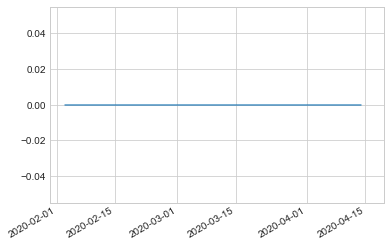

In [209]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-whitegrid')



In [291]:
len(df_covid_dept_list)

10

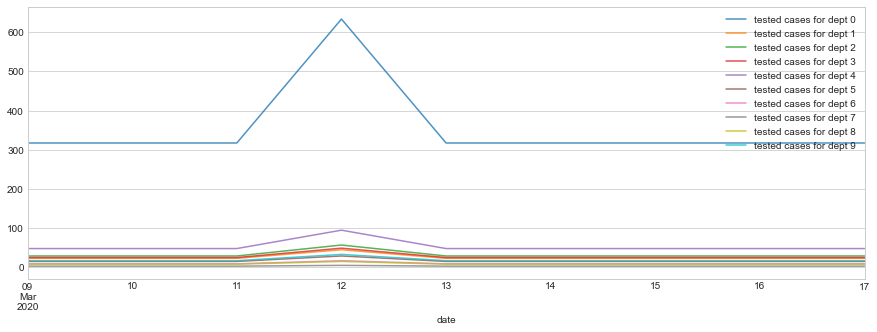

In [293]:
plt.figure(figsize=(15,5))

for group in range(0,10):
    df_covid_dept_list[group]['2020-03-09':'2020-03-17']['tested'].plot(label= f'tested cases for dept {group}',alpha=0.8)
#df_covid_dept_list[1]['2020-03-09':'2020-03-17']['positive'].plot(label='positive cases 1',alpha=0.8)
#df_covid_dept_list[0]['2020-03-09':'2020-03-17']['negative'].plot(label='negative cases',alpha=0.8)

plt.legend()
plt.show()

In [200]:
df_covid_by_dept = df_covid_ht.groupby('Département').sum()
df_covid_by_dept

,tested,positive,decease
Département,,,
1,15533.0,1176.0,49.0
2,1078.0,196.0,0.0
3,1372.0,0.0,0.0
4,1176.0,343.0,98.0
5,2303.0,196.0,0.0
6,686.0,49.0,0.0
7,392.0,0.0,0.0
8,98.0,0.0,0.0
9,343.0,49.0,0.0


---

world = pd.read_csv(r'../input/worldcities.csv')
world.head()

dom = world[world['iso2'] == 'DO']
dom.head()

dom.shape

dom.groupby(['city', 'admin_name']).count().shape

---

In [13]:
# Use the wikipedia module to retrieve data for Dominican Republic
wp.set_lang('en')
html1 = wp.page(r"Provinces_of_the_Dominican_Republic").html()
dom1 = pd.read_html(html1, header = 0)[1]
dom1.head()

,Province,Capital,Area (km²)[5],Population[4],Density[5]
0,Azua,Azua,2531.77,298246,118
1,Baoruco,Neiba,1282.23,111269,87
2,Barahona,Barahona,1739.38,232818,134
3,Dajabón,Dajabón,1020.73,87274,86
4,Distrito Nacional,Santo Domingo,104.44,1402749,13431


display(dom.head())

In [14]:
display(dom1.head())

,Province,Capital,Area (km²)[5],Population[4],Density[5]
0,Azua,Azua,2531.77,298246,118
1,Baoruco,Neiba,1282.23,111269,87
2,Barahona,Barahona,1739.38,232818,134
3,Dajabón,Dajabón,1020.73,87274,86
4,Distrito Nacional,Santo Domingo,104.44,1402749,13431


In [15]:
dom2 = pd.read_excel(r"C:\Users\dadyf\Downloads\dom_admgz_2020.xlsx", sheet_name = None)
dom2.keys()

dict_keys(['dom_gz_adm0', 'dom_gz_adm1', 'dom_gz_adm2', 'dom_gz_adm3', 'dom_gz_adm4'])

In [16]:
display(dom2['dom_gz_adm2'].head())
print(dom2['dom_gz_adm2'].shape)

,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM2_REF,ADM1_PCODE,ADM2_ES,ADM2_REF.1,ADM2_PCODE
0,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101
1,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Hermanas Mirabal,Provincia Hermanas Mirabal,DO0102
2,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia María Trinidad Sánchez,Provincia Maria Trinidad Sanchez,DO0103
3,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Samaná,Provincia Samana,DO0104
4,Dominican Republic,República Dominicana,DO,Región Cibao Noroeste,Region Cibao Noroeste,DO02,Provincia Dajabón,Provincia Dajabon,DO0201


(32, 9)


In [17]:
dom2['dom_gz_adm2']['ADM2_ES'].unique()

array(['Provincia Duarte', 'Provincia Hermanas Mirabal',
       'Provincia María Trinidad Sánchez', 'Provincia Samaná',
       'Provincia Dajabón', 'Provincia Monte Cristi',
       'Provincia Santiago Rodríguez', 'Provincia Valverde',
       'Provincia Espaillat', 'Provincia Puerto Plata',
       'Provincia Santiago', 'Provincia La Vega',
       'Provincia Monseñor Nouel', 'Provincia Sánchez Ramírez',
       'Provincia Elías Piña', 'Provincia San Juan', 'Provincia Baoruco',
       'Provincia Barahona', 'Provincia Independencia',
       'Provincia Pedernales', 'Provincia Hato Mayor',
       'Provincia Monte Plata', 'Provincia San Pedro de Macorís',
       'Distrito Nacional', 'Provincia Santo Domingo', 'Provincia Azua',
       'Provincia Peravia', 'Provincia San Cristóbal',
       'Provincia San José de Ocoa', 'Provincia El Seibo',
       'Provincia La Altagracia', 'Provincia La Romana'], dtype=object)

In [18]:
df_4 = dom2['dom_gz_adm2'][['ADM0_PCODE','ADM2_ES', 'ADM2_REF.1']]
df_4.head()

,ADM0_PCODE,ADM2_ES,ADM2_REF.1
0,DO,Provincia Duarte,Provincia Duarte
1,DO,Provincia Hermanas Mirabal,Provincia Hermanas Mirabal
2,DO,Provincia María Trinidad Sánchez,Provincia Maria Trinidad Sanchez
3,DO,Provincia Samaná,Provincia Samana
4,DO,Provincia Dajabón,Provincia Dajabon


In [19]:
df_4['ADM2_ES'] = df_4['ADM2_ES'].str.replace('Provincia ','')

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_4.head()

,ADM0_PCODE,ADM2_ES,ADM2_REF.1
0,DO,Duarte,Provincia Duarte
1,DO,Hermanas Mirabal,Provincia Hermanas Mirabal
2,DO,María Trinidad Sánchez,Provincia Maria Trinidad Sanchez
3,DO,Samaná,Provincia Samana
4,DO,Dajabón,Provincia Dajabon


In [21]:
df_4['ADM2_ES']

0                     Duarte
1           Hermanas Mirabal
2     María Trinidad Sánchez
3                     Samaná
4                    Dajabón
5               Monte Cristi
6         Santiago Rodríguez
7                   Valverde
8                  Espaillat
9               Puerto Plata
10                  Santiago
11                   La Vega
12            Monseñor Nouel
13           Sánchez Ramírez
14                Elías Piña
15                  San Juan
16                   Baoruco
17                  Barahona
18             Independencia
19                Pedernales
20                Hato Mayor
21               Monte Plata
22      San Pedro de Macorís
23         Distrito Nacional
24             Santo Domingo
25                      Azua
26                   Peravia
27             San Cristóbal
28          San José de Ocoa
29                  El Seibo
30             La Altagracia
31                 La Romana
Name: ADM2_ES, dtype: object

In [22]:
df_4['address'] = df_4['ADM2_ES'] +', '+ df_4['ADM0_PCODE']

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_4.head()

,ADM0_PCODE,ADM2_ES,ADM2_REF.1,address
0,DO,Duarte,Provincia Duarte,"Duarte, DO"
1,DO,Hermanas Mirabal,Provincia Hermanas Mirabal,"Hermanas Mirabal, DO"
2,DO,María Trinidad Sánchez,Provincia Maria Trinidad Sanchez,"María Trinidad Sánchez, DO"
3,DO,Samaná,Provincia Samana,"Samaná, DO"
4,DO,Dajabón,Provincia Dajabon,"Dajabón, DO"


In [24]:
df_4['lat'] = df_4['address'].apply(lambda x: geolocator.geocode(x).latitude )
df_4['lon'] = df_4['address'].apply(lambda x: geolocator.geocode(x).longitude )
df_4['address'] = df_4['address'].apply(lambda x: geolocator.geocode(x).address )

C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dadyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [25]:
df_4.head()

,ADM0_PCODE,ADM2_ES,ADM2_REF.1,address,lat,lon
0,DO,Duarte,Provincia Duarte,"Duarte, República Dominicana",19.243456,-70.087743
1,DO,Hermanas Mirabal,Provincia Hermanas Mirabal,"Hermanas Mirabal, República Dominicana",19.408967,-70.392841
2,DO,María Trinidad Sánchez,Provincia Maria Trinidad Sanchez,"María Trinidad Sánchez, República Dominicana",19.444598,-69.984468
3,DO,Samaná,Provincia Samana,"Samaná, República Dominicana",19.264811,-69.493002
4,DO,Dajabón,Provincia Dajabon,"Dajabón, República Dominicana",19.458693,-71.602296


In [26]:
display(df_ht.head())
display(dom1.head())
display(df_4.head())

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807


,Province,Capital,Area (km²)[5],Population[4],Density[5]
0,Azua,Azua,2531.77,298246,118
1,Baoruco,Neiba,1282.23,111269,87
2,Barahona,Barahona,1739.38,232818,134
3,Dajabón,Dajabón,1020.73,87274,86
4,Distrito Nacional,Santo Domingo,104.44,1402749,13431


,ADM0_PCODE,ADM2_ES,ADM2_REF.1,address,lat,lon
0,DO,Duarte,Provincia Duarte,"Duarte, República Dominicana",19.243456,-70.087743
1,DO,Hermanas Mirabal,Provincia Hermanas Mirabal,"Hermanas Mirabal, República Dominicana",19.408967,-70.392841
2,DO,María Trinidad Sánchez,Provincia Maria Trinidad Sanchez,"María Trinidad Sánchez, República Dominicana",19.444598,-69.984468
3,DO,Samaná,Provincia Samana,"Samaná, República Dominicana",19.264811,-69.493002
4,DO,Dajabón,Provincia Dajabon,"Dajabón, República Dominicana",19.458693,-71.602296


In [27]:
df_4.rename(columns={'ADM0_PCODE':'adm0code', 'ADM2_ES':'Province'}, inplace = True)
df_dom = dom1.merge(df_4, on='Province', how='right')
df_dom.head()

C:\Users\dadyf\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Province,Capital,Area (km²)[5],Population[4],Density[5],adm0code,ADM2_REF.1,address,lat,lon
0,Azua,Azua,2531.77,298246,118,DO,Provincia Azua,"Azua, República Dominicana",18.576793,-70.833477
1,Baoruco,Neiba,1282.23,111269,87,DO,Provincia Baoruco,"Baoruco, República Dominicana",18.489458,-71.330847
2,Barahona,Barahona,1739.38,232818,134,DO,Provincia Barahona,"Barahona, República Dominicana",18.171481,-71.209530
3,Dajabón,Dajabón,1020.73,87274,86,DO,Provincia Dajabon,"Dajabón, República Dominicana",19.458693,-71.602296
4,Distrito Nacional,Santo Domingo,104.44,1402749,13431,DO,Distrito Nacional,"Distrito Nacional, República Dominicana",18.485258,-69.929908


In [28]:
df_dom.columns.to_list()

['Province',
 'Capital',
 'Area (km²)[5]',
 'Population[4]',
 'Density[5]',
 'adm0code',
 'ADM2_REF.1',
 'address',
 'lat',
 'lon']

In [29]:
df_dom = df_dom[['adm0code',
 'Province',
 'ADM2_REF.1',
 'Capital',
 'Area (km²)[5]',
 'Population[4]',
 'Density[5]',
 'address',
 'lat',
 'lon']]

df_dom.head()

,adm0code,Province,ADM2_REF.1,Capital,Area (km²)[5],Population[4],Density[5],address,lat,lon
0,DO,Azua,Provincia Azua,Azua,2531.77,298246,118,"Azua, República Dominicana",18.576793,-70.833477
1,DO,Baoruco,Provincia Baoruco,Neiba,1282.23,111269,87,"Baoruco, República Dominicana",18.489458,-71.330847
2,DO,Barahona,Provincia Barahona,Barahona,1739.38,232818,134,"Barahona, República Dominicana",18.171481,-71.209530
3,DO,Dajabón,Provincia Dajabon,Dajabón,1020.73,87274,86,"Dajabón, República Dominicana",19.458693,-71.602296
4,DO,Distrito Nacional,Distrito Nacional,Santo Domingo,104.44,1402749,13431,"Distrito Nacional, República Dominicana",18.485258,-69.929908


In [30]:
import requests
import json

url = "https://dr-covid-19-tracker.p.rapidapi.com/provinces"

headers = {
    'x-rapidapi-host': "dr-covid-19-tracker.p.rapidapi.com",
    'x-rapidapi-key': "ade64d90cbmshdd1da1274dfdcfdp11cb27jsn0f762048d1e8"
    }

response = requests.request("GET", url, headers=headers)

result = response.json()

In [31]:
result = response.json()
result[0]

{'country': [{'code': 'DOM',
   'name': 'Dominican Republic',
   'total_confirmed': 4680,
   'total_recovered': 363,
   'total_deaths': 226,
   'tests': 15583}]}

In [32]:
result[1].keys()

dict_keys(['provinces'])

In [33]:
result[1]['provinces'][0]

{'iso': '01',
 'name': 'Distrito Nacional',
 'code': 'DN',
 'country': 'Dominican Republic',
 'confirmed': 1198,
 'recovered': 191,
 'deaths': 30}

In [34]:
name, confirmed , recovered, deaths = [],[],[],[]

for res in result[1]['provinces']:
    name.append(res['name'])
    confirmed.append(res['confirmed'])
    recovered.append(res['recovered'])
    deaths.append(res['deaths'])
    
covid_dom = pd.DataFrame({'Province':name, 'confirmed':confirmed, 'recovered':recovered, 'deaths':deaths})
covid_dom.head()

,Province,confirmed,recovered,deaths
0,Distrito Nacional,1198,191,30
1,Azua,22,1,1
2,Bahoruco,4,1,0
3,Barahona,25,1,1
4,Dajabón,1,0,0


In [35]:
covid_dom.shape

(32, 4)

In [36]:
is_diff(covid_dom['Province'], df_dom['Province'])

{'Elias Piña', 'Bahoruco'}


In [37]:
covid_dom['Province'] = covid_dom['Province'].replace(['Bahoruco', 'Elias Piña' ], ['Baoruco', 'Elías Piña'])

In [38]:
covid_dom['Province'].unique()

array(['Distrito Nacional', 'Azua', 'Baoruco', 'Barahona', 'Dajabón',
       'Duarte', 'Elías Piña', 'El Seibo', 'Espaillat', 'Independencia',
       'La Altagracia', 'La Romana', 'La Vega', 'María Trinidad Sánchez',
       'Monte Cristi', 'Pedernales', 'Peravia', 'Puerto Plata',
       'Hermanas Mirabal', 'Samaná', 'San Cristóbal', 'San Juan',
       'San Pedro de Macorís', 'Sánchez Ramírez', 'Santiago',
       'Santiago Rodríguez', 'Valverde', 'Monseñor Nouel', 'Monte Plata',
       'Hato Mayor', 'San José de Ocoa', 'Santo Domingo'], dtype=object)

In [39]:
df_dom_final = df_dom.merge(covid_dom, on = 'Province', how = 'left')
df_dom_final.head()

,adm0code,Province,ADM2_REF.1,Capital,Area (km²)[5],Population[4],Density[5],address,lat,lon,confirmed,recovered,deaths
0,DO,Azua,Provincia Azua,Azua,2531.77,298246,118,"Azua, República Dominicana",18.576793,-70.833477,22,1,1
1,DO,Baoruco,Provincia Baoruco,Neiba,1282.23,111269,87,"Baoruco, República Dominicana",18.489458,-71.330847,4,1,0
2,DO,Barahona,Provincia Barahona,Barahona,1739.38,232818,134,"Barahona, República Dominicana",18.171481,-71.209530,25,1,1
3,DO,Dajabón,Provincia Dajabon,Dajabón,1020.73,87274,86,"Dajabón, República Dominicana",19.458693,-71.602296,1,0,0
4,DO,Distrito Nacional,Distrito Nacional,Santo Domingo,104.44,1402749,13431,"Distrito Nacional, República Dominicana",18.485258,-69.929908,1198,191,30


In [40]:
df_dom_final.shape

(32, 13)

In [43]:
df_ht.to_csv(r'../output/cleaned/df_ht.csv', index = False)
df_ht.head()

,Département,Chef-Lieu ou Capitale,Superficie (km²),adm0code,Population,Density/km²,address,lat,lon
0,Artibonite,Les Gonaïves,4984,HT,2047152,412,"Les Gonaïves, Arrondissement des Gonaïves, Dép...",19.446060,-72.688434
1,Centre,Hinche,3675,HT,845594,231,"Hinche, Arrondissement de Hinche, Département ...",19.144554,-72.008753
2,Grande'Anse,Jérémie,1871,HT,481065,258,"Jérémie, Arrondissement de Jérémie, Départemen...",18.644583,-74.113918
3,Nippes,Miragoâne,1268,HT,351593,278,"Miragoâne, Arrondissement de Miragoâne, Départ...",18.444843,-73.088639
4,Nord,Cap-Haïtien,2106,HT,1159761,552,"Cap-Haïtien, Arrondissement de Cap-Haïtien, Dé...",19.759524,-72.200807


In [44]:
df_dom_final.to_csv(r'../output/cleaned/df_dom.csv', index = False)
df_dom_final.head()

,adm0code,Province,ADM2_REF.1,Capital,Area (km²)[5],Population[4],Density[5],address,lat,lon,confirmed,recovered,deaths
0,DO,Azua,Provincia Azua,Azua,2531.77,298246,118,"Azua, República Dominicana",18.576793,-70.833477,22,1,1
1,DO,Baoruco,Provincia Baoruco,Neiba,1282.23,111269,87,"Baoruco, República Dominicana",18.489458,-71.330847,4,1,0
2,DO,Barahona,Provincia Barahona,Barahona,1739.38,232818,134,"Barahona, República Dominicana",18.171481,-71.209530,25,1,1
3,DO,Dajabón,Provincia Dajabon,Dajabón,1020.73,87274,86,"Dajabón, República Dominicana",19.458693,-71.602296,1,0,0
4,DO,Distrito Nacional,Distrito Nacional,Santo Domingo,104.44,1402749,13431,"Distrito Nacional, República Dominicana",18.485258,-69.929908,1198,191,30
